# Gradient Descent
This notebook demonstrates the gradient descent approach to determine the best fitting parameters by linear regression. 



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import sklearn.decomposition
import math
from sklearn import preprocessing

import matplotlib
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from collections import defaultdict

from tqdm.notebook import tqdm
from ipywidgets import interact
%matplotlib inline

## Part 1 - Toy Example
Firstly, we demonstrate gradient descent on a simple linear regression problem with one dependent and one independent variable.

In [2]:
X = np.array([1,1,2,3,4,5,6,7,8,9,10,10])
y = np.array([1,2,3,1,4,5,6,4,7,10,15,9])

x and y values are plotted in a diagram.

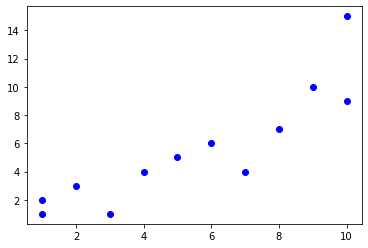

In [3]:
plt.plot(X, y, 'bo')
plt.show()

We then try to fit the points by a straight line.

In [4]:
theta0 = -0.5
theta1 = 1

In [5]:
def predict(X, theta0, theta1):
    y_pred = theta0 + theta1 * X
    return y_pred

y_pred = predict(X, theta0, theta1)

C:\Users\Dave\.virtualenvs\ADML-1DDpmVWL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


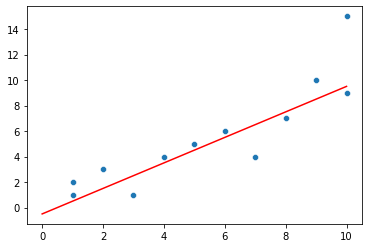

In [6]:
def plot_regression_line(X, theta0, theta1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x = np.arange(X.min()-1, X.max()+1, 1).reshape(-1,1)
    y_pred = predict(x, theta0, theta1)
    ax.plot(x, y_pred, color="r")
    
ax = sns.scatterplot(X, y)
plot_regression_line(X, theta0, theta1, ax)
plt.show()

This does not look so bad. Let's implement a gradient descent algorithm to do this automatically.

### Cost function
We define a cost function that determines the mean squared error of the predicted and the actual y coordinates. To get rid of the factor 2 in the gradient
formula, we divide the sum by 2.

> Implement the MSE cost function

In [17]:
def cost(y, y_pred):
    cost = np.sum((y - y_pred) ** 2)/(2*len(y))
    return cost

In [15]:
def cost(y, y_pred):
    cost = np.sum((y_pred - y) ** 2) / (2 * len(y))
    return cost

In [18]:
cost(y, y_pred)

1.9583333333333333

### Calculate gradient

Next, let us determine the gradient of y in respect to the parameters.

> Implement the `gradient` function

In [21]:
#def gradient(X, y, theta0, theta1):
#    Q = ((-2*X).dot(y)+(2*(X.T)).dot(X).dot([theta0, theta1]))
#    grad_theta0 = Q[0]
#    grad_theta1 = +[1]
#    return grad_theta0, grad_theta1

In [23]:
def gradient(X, y, theta0, theta1):
    y_pred = predict(X, theta0, theta1)
    diff = y_pred - y
    
    n = len(X)
    grad_theta0 = np.sum(diff) / n
    grad_theta1 = np.dot(diff, X.T) / n
    
    return grad_theta0, grad_theta1

In [24]:
gradient(X, y, theta0, theta1)

(-0.5833333333333334, -4.166666666666667)

### Batch Gradient descent


> Now complete the `fit` function by iteratively updating our model parameters.

To visualize how the parameters and cost functions change with each epoch, we store them in a dictionary.

In [ ]:
def fit(X, y, alpha, num_epochs, display_every=10):
    theta0 = 0.0
    theta1 = np.random.randn()
    
    hist = defaultdict(list)
    for epoch in tqdm(range(1, num_epochs + 1)):
        # START YOUR CODE
        
        
        
        
        
        
        # END YOUR CODE
        y_pred = predict(X, theta0, theta1)
        curr_cost = cost(y, y_pred)
        
        hist["cost"].append(curr_cost)
        hist["theta0"].append(theta0)
        hist["theta1"].append(theta1)

        if epoch % display_every == 0:
            print("Epoch {} -  cost: {}".format(epoch, curr_cost))
        
    return theta0, theta1, hist

In [25]:
def fit(X, y, alpha, num_epochs, display_every=10):
    theta0 = 0.0
    theta1 = np.random.randn()
    
    hist = defaultdict(list)
    for epoch in tqdm(range(1, num_epochs + 1)):
        grad_theta0, grad_theta1 = gradient(X, y, theta0, theta1)
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1
        
        y_pred = predict(X, theta0, theta1)
        curr_cost = cost(y, y_pred)
        
        hist["cost"].append(curr_cost)
        hist["theta0"].append(theta0)
        hist["theta1"].append(theta1)

        if epoch % display_every == 0:
            print("Epoch {} -  cost: {}".format(epoch, curr_cost))
        
    return theta0, theta1, hist

In [26]:
alpha = 0.01
num_epochs = 20

theta0, theta1, hist = fit(X, y, alpha, num_epochs, display_every=2)

Epoch 2 -  cost: 3.1580094301817216
Epoch 4 -  cost: 1.942829990981549
Epoch 6 -  cost: 1.7977710098871489
Epoch 8 -  cost: 1.7801883165261911
Epoch 10 -  cost: 1.7777936611785705
Epoch 12 -  cost: 1.7772111846668872
Epoch 14 -  cost: 1.7768475188812023
Epoch 16 -  cost: 1.7765128319152195
Epoch 18 -  cost: 1.7761844820480377
Epoch 20 -  cost: 1.7758597436184829



### Visualize learning 
We can now visualize the learning process by plotting the validation curve. The validation curve shows how the cost decreases by increasing number of epochs.

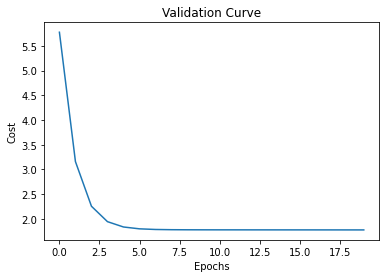

In [27]:
def plot_validation_curve(data, ax=None, ylim=None):
    if ax is None:
        fig, ax = plt.subplots()
        ax.set_title("Validation Curve")
        ax.set_ylabel("Cost")
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_xlabel("Epochs")
    ax.plot(data)
    
plot_validation_curve(hist["cost"])

Using our history, we can now visualize how the parameters change by each epoch.

In [28]:
@interact(epoch=(1, len(hist["theta0"])))
def visualize_learning(epoch=1):
    ax = sns.scatterplot(X, y)
    plot_regression_line(X, hist["theta0"][epoch-1], hist["theta1"][epoch-1], ax)
    plt.show()

interactive(children=(IntSlider(value=1, description='epoch', max=20, min=1), Output()), _dom_classes=('widget…

### Contour plot
We can visualize how our model parameters $\Theta$ change after each epoch by displaying a contour plot.

In [29]:
def parallel_cost(Theta0, Theta1, X, y):
    m = Theta0.shape[0]
    n = Theta0.shape[1]
    tot = np.zeros((m,n))
    for i in range(1,len(X)):
        tot += (Theta0 + Theta1 * X[i] - y[i]) ** 2;
    return tot/(2*len(X))

In [31]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

def contour_plot_zoomed(X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,8))
    delta = 0.025
    t0 = np.arange(-0.5, 0.5, delta)
    t1 = np.arange(0.5, 1.5, delta)
    T0, T1 = np.meshgrid(t0, t1)
    Z = parallel_cost(T0, T1, X, y)
    CS = ax.contour(T0, T1, Z, levels = [0.25,0.5,1,2,3])
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Contour plot')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    return ax

In [32]:
@interact(epoch=(1, len(hist["theta0"])))
def visualize_contour_plot(epoch=1):
    ax = contour_plot_zoomed(X, y)
    for i in range(epoch):
        theta0 = hist["theta0"][i]
        theta1 = hist["theta1"][i]
        ax.plot(theta0, theta1, "ro", linewidth=9)
        if i == 0: 
            continue
            
        theta0_prev = hist["theta0"][i-1]
        theta1_prev = hist["theta1"][i-1]
        
        ax.annotate('', xy=[theta0, theta1], xytext=[theta0_prev, theta1_prev],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    plt.show()

interactive(children=(IntSlider(value=1, description='epoch', max=20, min=1), Output()), _dom_classes=('widget…

### Normalise data
Let's run the experiment above again but this time first normalise the data and see what happens.
We use the `StandardScaler` which implements z-normalisation.

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).reshape(-1)
X_scaled

array([-1.40556386, -1.40556386, -1.09321633, -0.78086881, -0.46852129,
       -0.15617376,  0.15617376,  0.46852129,  0.78086881,  1.09321633,
        1.40556386,  1.40556386])

#### Apply gradient descent algorithm on normalised data.

Epoch 2 -  cost: 20.78484605952842
Epoch 4 -  cost: 20.034536885162876
Epoch 6 -  cost: 19.313792886000936
Epoch 8 -  cost: 18.621449076174535
Epoch 10 -  cost: 17.956386374907094
Epoch 12 -  cost: 17.317529797669767
Epoch 14 -  cost: 16.703846718613335
Epoch 16 -  cost: 16.114345201467216
Epoch 18 -  cost: 15.548072396207706
Epoch 20 -  cost: 15.004112998903906



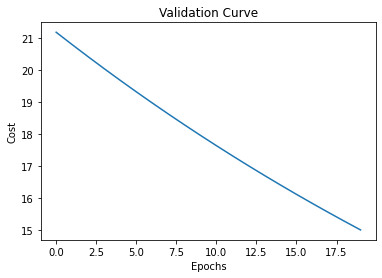

In [34]:
alpha = 0.01
num_epochs = 20

theta0, theta1, hist_scaled = fit(X_scaled, y, alpha, num_epochs, display_every=2)
plot_validation_curve(hist_scaled["cost"])

It seems like it did not converge yet. Let's increase the learning rate $\alpha$ and the number of epochs and run it again.

Epoch 5 -  cost: 8.589414546571284
Epoch 10 -  cost: 4.130453966292318
Epoch 15 -  cost: 2.5757105466932577
Epoch 20 -  cost: 2.0336050363917186
Epoch 25 -  cost: 1.8445845326901633
Epoch 30 -  cost: 1.7786771583125889
Epoch 35 -  cost: 1.7556966778235295
Epoch 40 -  cost: 1.7476838797338559
Epoch 45 -  cost: 1.744889989795113
Epoch 50 -  cost: 1.74391582060946



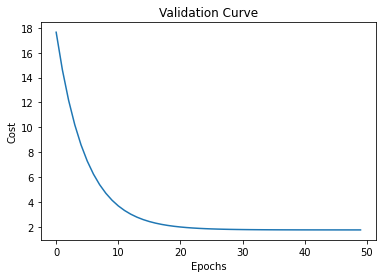

In [35]:
alpha = 0.1
num_epochs = 50

theta0, theta1, hist_scaled = fit(X_scaled, y, alpha, num_epochs, display_every=5)
plot_validation_curve(hist_scaled["cost"])

That looks much better now. Okay, let's plot the contours.

In [36]:
def contour_plot(X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,8))
    delta = 0.025
    t0 = np.arange(0, 9, delta)
    t1 = np.arange(0, 9, delta)
    T0, T1 = np.meshgrid(t0, t1)
    Z = parallel_cost(T0, T1, X, y)
    CS = ax.contour(T0, T1, Z, levels = [1,2,3,4,5,6])
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Contour plot')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    return ax

In [37]:
@interact(epoch=(1, len(hist_scaled["theta0"])))
def visualize_contour_plot(epoch=1):
    ax = contour_plot(X_scaled, y)
    for i in range(epoch):
        theta0 = hist_scaled["theta0"][i]
        theta1 = hist_scaled["theta1"][i]
        ax.plot(theta0, theta1, "ro", linewidth=9)
        if i == 0: 
            continue
            
        theta0_prev = hist_scaled["theta0"][i-1]
        theta1_prev = hist_scaled["theta1"][i-1]
        
        ax.annotate('', xy=[theta0, theta1], xytext=[theta0_prev, theta1_prev],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    plt.show()

interactive(children=(IntSlider(value=1, description='epoch', max=50, min=1), Output()), _dom_classes=('widget…

The contours are not as narrow as before. 

<span style="color:red">
    Make sure that you never forget to scale your data before applying the gradient descent algorithm!</span>

## Part 2 - House prices data set
Now that we have tested our functions with our toy datset, let's move to a the house price dataset.

In [38]:
df_house = pd.read_csv('house_prices.csv')
df_house.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


We want to predict the price of a house based on its size.

Let's split the feature from the target variable.

In [39]:
X_house = df_house[["Size"]].values
y_house = df_house.Price.values

Next, we further split the data into a training and test set.

In [40]:
split = train_test_split(X_house, y_house, test_size=0.2, random_state=42)
(X_train_house, X_test_house, y_train_house, y_test_house) = split
X_train_house = X_train_house.reshape(-1)
X_test_house = X_test_house.reshape(-1)

Here we visualize our training data in a scatter plot.

C:\Users\Dave\.virtualenvs\ADML-1DDpmVWL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

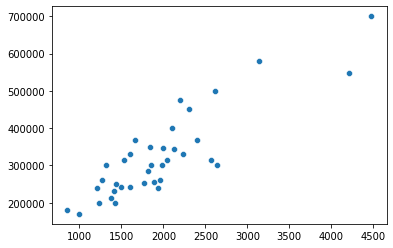

In [41]:
sns.scatterplot(X_train_house.reshape(-1), y_train_house)

#### Apply Batch Gradient Descent
Let's use our implemented `fit` method to apply batch gradient descent to the house price dataset and see what happens.

Epoch 20 -  cost: 3.1974129473531992e+196
Epoch 40 -  cost: inf
Epoch 60 -  cost: inf
Epoch 80 -  cost: nan
Epoch 100 -  cost: nan
Epoch 120 -  cost: nan
Epoch 140 -  cost: nan
Epoch 160 -  cost: nan
Epoch 180 -  cost: nan
Epoch 200 -  cost: nan
Epoch 220 -  cost: nan
Epoch 240 -  cost: nan
Epoch 260 -  cost: nan
Epoch 280 -  cost: nan
Epoch 300 -  cost: nan



C:\Users\Dave\AppData\Local\Temp\ipykernel_24016\2446940372.py:2: RuntimeWarning: overflow encountered in square
  cost = np.sum((y - y_pred) ** 2)/(2*len(y))
C:\Users\Dave\.virtualenvs\ADML-1DDpmVWL\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Dave\AppData\Local\Temp\ipykernel_24016\2173058858.py:8: RuntimeWarning: invalid value encountered in double_scalars
  theta0 = theta0 - alpha * grad_theta0
C:\Users\Dave\AppData\Local\Temp\ipykernel_24016\2173058858.py:9: RuntimeWarning: invalid value encountered in double_scalars
  theta1 = theta1 - alpha * grad_theta1


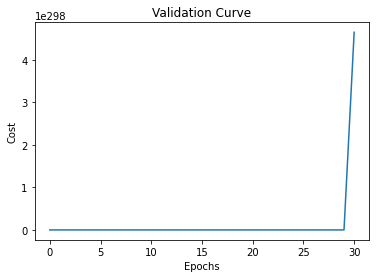

In [42]:
alpha = 0.01
num_epochs = 300

theta0, theta1, hist_house = fit(X_train_house, y_train_house, alpha, num_epochs, display_every=20)
plot_validation_curve(hist_house["cost"])

It seems like our gradient descent algorithm does not converge! 

> Why did that happen?

### Scaling the data
Let's try it again but this time we will scale the data accordingly.

In [43]:
X_house_scaled = df_house[["Size"]].values
y_house_scaled = df_house.Price.values

split = train_test_split(X_house_scaled, y_house_scaled, test_size=0.2, random_state=42)
(X_train_house_scaled, X_test_house_scaled, y_train_house_scaled, y_test_house_scaled) = split

> z-normalise the training and test data by using the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
# z-normalise the training and test data.

In [44]:
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house_scaled).reshape(-1)
X_test_house_scaled = scaler.transform(X_test_house_scaled)

Now we apply the gradient descent algorithm again.

Epoch 20 -  cost: 39881961387.91138
Epoch 40 -  cost: 27198682427.694122
Epoch 60 -  cost: 18713926997.247757
Epoch 80 -  cost: 13037865235.908405
Epoch 100 -  cost: 9240740217.675098
Epoch 120 -  cost: 6700570816.7186365
Epoch 140 -  cost: 5001269225.495903
Epoch 160 -  cost: 3864484451.675379
Epoch 180 -  cost: 3104007542.4174266
Epoch 200 -  cost: 2595269967.0794935
Epoch 220 -  cost: 2254938896.655201
Epoch 240 -  cost: 2027267021.977561
Epoch 260 -  cost: 1874960967.5976052
Epoch 280 -  cost: 1773072518.5582361
Epoch 300 -  cost: 1704912023.626433



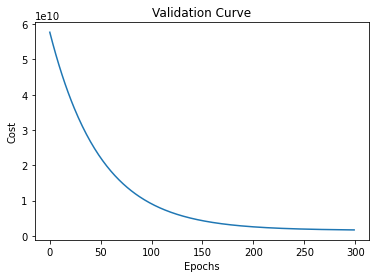

In [45]:
alpha = 0.01
num_epochs = 300

theta0, theta1, hist_house_scaled = fit(X_train_house_scaled, y_train_house_scaled, alpha, 
                                        num_epochs, display_every=20)
plot_validation_curve(hist_house_scaled["cost"])

Our validation curve looks much better now. We see that the cost converges after a few epochs.

Again we can visualize how our regression line looks after each epoch.

In [46]:
@interact(epoch=(1, len(hist_house_scaled["theta0"])))
def visualize_learning(epoch=1):
    ax = sns.scatterplot(X_train_house_scaled, y_train_house_scaled)
    plot_regression_line(X_train_house_scaled, 
                         hist_house_scaled["theta0"][epoch-1], 
                         hist_house_scaled["theta1"][epoch-1], ax)
    plt.show()

interactive(children=(IntSlider(value=1, description='epoch', max=300, min=1), Output()), _dom_classes=('widge…

### Calculate metrics on the test set
> Now calculate the $R^2$ score on the test set by using the previously implemented `predict` function.

In [47]:
y_pred_house_scaled = predict(X_test_house_scaled, theta0, theta1)
r2 = r2_score(y_test_house_scaled, y_pred_house_scaled)
print("R2:", r2)

R2: 0.4065091584271787


## Part 3 -  Autoscout data set
We extend our code for multiple linear regression. We will use the autoscout dataset from the previous exercises. First we apply the data cleaning and then z-Normalise our data.

In [48]:
df_autoscout = pd.read_csv('cars.csv')
df_autoscout.drop(['Name', 'Registration'], axis='columns', inplace=True)
df_autoscout.drop([17010, 7734, 47002, 44369, 24720, 50574, 36542, 42611,
         22513, 12773, 21501, 2424, 52910, 29735, 43004, 47125], axis='rows', inplace=True)
df_autoscout.drop(df_autoscout.index[df_autoscout.EngineSize > 7500], axis='rows', inplace=True)
df_autoscout.drop_duplicates(inplace=True)
df_autoscout.head()

numerical_cols = ['Price', 'Mileage', 'Horsepower', 'EngineSize']

df_autoscout = pd.get_dummies(df_autoscout)

train_autoscout, test_autoscout = train_test_split(df_autoscout, test_size=0.4, random_state=42)

q3 = train_autoscout.loc[:, numerical_cols].describe().loc['75%']
iqr = q3 - df_autoscout.loc[:, numerical_cols].describe().loc['25%']
upper_boundary = q3 + 1.5*iqr
upper_boundary

# And here the outliers are removed
train_autoscout = train_autoscout[(train_autoscout.Price <= upper_boundary.Price) &
        (train_autoscout.Mileage <= upper_boundary.Mileage) &
        (train_autoscout.Horsepower <= upper_boundary.Horsepower) &
        (train_autoscout.EngineSize <= upper_boundary.EngineSize)]

test_autoscout = test_autoscout[(test_autoscout.Price <= upper_boundary.Price) &
        (test_autoscout.Mileage <= upper_boundary.Mileage) &
        (test_autoscout.Horsepower <= upper_boundary.Horsepower) &
        (test_autoscout.EngineSize <= upper_boundary.EngineSize)]

X_train_autoscout = train_autoscout.drop(columns=["Price"]).values
X_test_autoscout = test_autoscout.drop(columns=["Price"]).values

y_train_autoscout = train_autoscout.Price.values
y_test_autoscout = test_autoscout.Price.values

# z-Normalise the data
scaler = StandardScaler()
X_train_autoscout = scaler.fit_transform(X_train_autoscout)
X_test_autoscout = scaler.transform(X_test_autoscout)

We modify our predict function that instead of providing $\theta_0$ and $\theta_1$ we now provide the bias ($\theta_0$) and the other parameters $\Theta$ as an array. 
> Implement the `predict` function

In [ ]:
def predict(X, bias, thetas):
    # START YOUR CODE
    
    # END YOUR CODE
    return y_pred

In [49]:
def predict(X, bias, thetas):
    y_pred = bias + np.dot(X, thetas)
    return y_pred

> Implement the `gradient` function

In [ ]:
def gradient(X, y, bias, thetas):
    # START YOUR CODE
    
    
    
    # END YOUR CODE
    return grad_bias, grad_thetas

In [50]:
def gradient(X, y, bias, thetas):
    y_pred = predict(X, bias, thetas)
    diff = y_pred - y
    
    n = len(X)
    grad_bias = np.sum(diff) / n
    grad_thetas = np.dot(diff, X) / n
    
    return grad_bias, grad_thetas

We extend our `fit` function by tracking not only the cost but also the $R^2$ score.

In [51]:
def fit(X_train, y_train, alpha, num_epochs, display_every=50):
    bias = 0.0
    thetas = np.random.randn(*(1, X_train.shape[1])).reshape(-1)
    
    hist = defaultdict(list)
    for epoch in tqdm(range(1, num_epochs+1)):
        grad_bias, grad_thetas = gradient(X_train, y_train, bias, thetas)
        bias = bias - alpha * grad_bias
        thetas = thetas - alpha * grad_thetas
        
        y_pred_train = predict(X_train, bias, thetas)
        train_cost = cost(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)
        
        hist["train_cost"].append(train_cost)
        hist["train_r2"].append(train_r2)
        
        if epoch % display_every == 0:
            print("Epoch {0} - cost: {1:.2} - r2: {2:.4}"
                  .format(epoch, train_cost, train_r2))
        
    return bias, thetas, hist

In [53]:
alpha = 0.01
num_epochs = 1000
bias, thetas, hist_autoscout = fit(X_train_autoscout, y_train_autoscout, alpha, num_epochs)

Epoch 50 - cost: 1.4e+08 - r2: -0.1979
Epoch 100 - cost: 7e+07 - r2: 0.4164
Epoch 150 - cost: 4.5e+07 - r2: 0.6264
Epoch 200 - cost: 3.6e+07 - r2: 0.7027
Epoch 250 - cost: 3.2e+07 - r2: 0.7313
Epoch 300 - cost: 3.1e+07 - r2: 0.7423
Epoch 350 - cost: 3e+07 - r2: 0.7468
Epoch 400 - cost: 3e+07 - r2: 0.7487
Epoch 450 - cost: 3e+07 - r2: 0.7496
Epoch 500 - cost: 3e+07 - r2: 0.7501
Epoch 550 - cost: 3e+07 - r2: 0.7504
Epoch 600 - cost: 3e+07 - r2: 0.7506
Epoch 650 - cost: 3e+07 - r2: 0.7508
Epoch 700 - cost: 3e+07 - r2: 0.7509
Epoch 750 - cost: 3e+07 - r2: 0.751
Epoch 800 - cost: 3e+07 - r2: 0.7511
Epoch 850 - cost: 3e+07 - r2: 0.7511
Epoch 900 - cost: 3e+07 - r2: 0.7512
Epoch 950 - cost: 3e+07 - r2: 0.7512
Epoch 1000 - cost: 3e+07 - r2: 0.7512



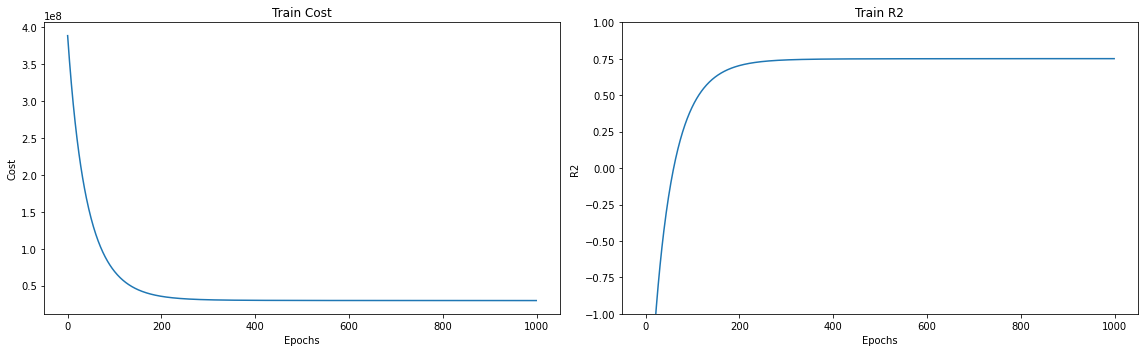

In [54]:
def plot_validation_curves(hist, ylim=None):
    fig, ax = plt.subplots(ncols=2, figsize=(16,5))

    ax[0].set_title("Train Cost")
    ax[0].set_ylabel("Cost")
    plot_validation_curve(hist["train_cost"], ax[0], ylim)

    ax[1].set_title("Train R2")
    ax[1].set_ylabel("R2")
    ax[1].set_ylim(-1, 1)
    plot_validation_curve(hist["train_r2"], ax[1])

    plt.tight_layout()

plot_validation_curves(hist_autoscout)

### Calculate metrics on test set
Now we calculate the $R^2$ score on the test set.

In [55]:
y_pred_autoscout = predict(X_test_autoscout, bias, thetas)
r2 = r2_score(y_test_autoscout, y_pred_autoscout)
print("R2:", r2)

R2: 0.7477929333136561


Compared to the previous exercise where we calculated the estimates for the $\Theta$ numerically using the normal equation we got almost the same result with the gradient descent algorithm.

### Minibatch Gradient Descent

> Now  modify our `fit` function to use mini batch gradient descent. So instead of calculating the gradient on the whole dataset on each step, only use a subset of the data.

In [56]:
def fit(X_train, y_train, alpha, num_epochs, batch_size, display_every=50):
    bias = 0.0
    thetas = np.random.randn(*(1, X_train.shape[1])).reshape(-1)
    hist = defaultdict(list)
    
    indices_train = np.arange(len(X_train))
    
    num_samples = len(X_train)
    steps = int(num_samples/batch_size)
    
    for epoch in tqdm(range(1, num_epochs + 1)):
        # randomize inputs
        np.random.shuffle(indices_train)
        
        X_train_epoch = X_train[indices_train]
        y_train_epoch = y_train[indices_train]
        
        for step in range(steps):
            start = step * batch_size
            end = step * batch_size + batch_size
            
            X_train_mini = X_train_epoch[start:end]
            y_train_mini = y_train_epoch[start:end]
        
            # START YOUR CODE
            # Apply gradient descent
            
            
            
            # END YOUR CODE

        y_pred_train = predict(X_train, bias, thetas)
        
        train_cost = cost(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)

        hist["train_cost"].append(train_cost)
        hist["train_r2"].append(train_r2)
        
        if epoch % display_every == 0 or epoch == num_epochs:
            print("Epoch {0} - train_cost: {1:.2} - train_r2: {2:.4}".format(epoch, train_cost, train_r2))
        
    return bias, thetas, hist

In [57]:
def fit(X_train, y_train, alpha, num_epochs, batch_size, display_every=50):
    bias = 0.0
    thetas = np.random.randn(*(1, X_train.shape[1])).reshape(-1)
    hist = defaultdict(list)
    
    indices_train = np.arange(len(X_train))   
    
    num_samples = len(X_train)
    steps = int(num_samples/batch_size)
    
    for epoch in tqdm(range(1, num_epochs + 1)):
        # randomize inputs
        np.random.shuffle(indices_train)
        
        X_train_epoch = X_train[indices_train]
        y_train_epoch = y_train[indices_train]
        
        for step in range(steps):
            start = step * batch_size
            end = step * batch_size + batch_size
            
            X_train_mini = X_train_epoch[start:end]
            y_train_mini = y_train_epoch[start:end]
        
            grad_bias, grad_thetas = gradient(X_train_mini, y_train_mini, bias, thetas)
            bias = bias - alpha * grad_bias
            thetas = thetas - alpha * grad_thetas

        y_pred_train = predict(X_train, bias, thetas)
        
        train_cost = cost(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)

        hist["train_cost"].append(train_cost)
        hist["train_r2"].append(train_r2)
        
        if epoch % display_every == 0 or epoch == num_epochs:
            print("Epoch {0} - train_cost: {1:.2} - train_r2: {2:.4}".format(epoch, train_cost, train_r2))
        
    return bias, thetas, hist

Wo have now introduced an additional hyperparameter `batch_size`. 
* If we set `batch_size` equal to 1, we use Stochastic Gradient Desccent: We update our model parameters $\Theta$ for each training example. 
* If we set `batch_size` equal to to the number of training samples we have again Batch Gradient Descent: We use all training samples to update the model parameters $\Theta$.

#### Batch Gradient Descent
We run batch gradient descent and see what happens

Epoch 50 - train_cost: 1.4e+08 - train_r2: -0.1979



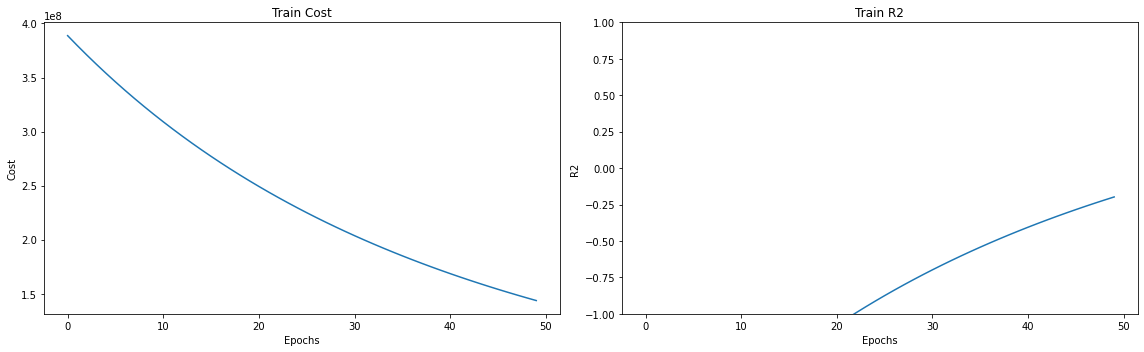

In [58]:
alpha = 1e-2
num_epochs = 50
batch_size = len(X_train_autoscout)

bias, thetas, hist_autoscout_batch = fit(X_train_autoscout, y_train_autoscout, alpha, num_epochs, batch_size)
plot_validation_curves(hist_autoscout_batch)

We can notice the following:
* The training did not converge after those 50 epochs. We would need more epochs.
* The training cost is strictly decreasing as we take all training samples per step

#### Minibatch Gradient Descnet
Let's compare it to minibatch gradient descent with a `batch_size` of 100.

Epoch 50 - train_cost: 3e+07 - train_r2: 0.7512



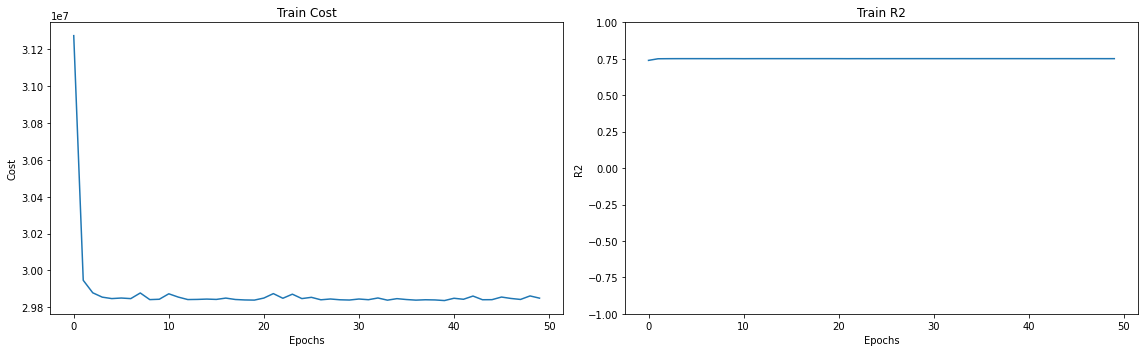

In [59]:
alpha = 1e-2
num_epochs = 50
batch_size = 100

bias, thetas, hist_autoscout_minibatch = fit(X_train_autoscout, y_train_autoscout, alpha, num_epochs, batch_size)
plot_validation_curves(hist_autoscout_minibatch)

* As we are taking only a subset of our data when applying gradient descent, the training cost are not stricly decreasing anymore. 
* We do not need as many epochs as before as we are doing much more updates now.

### Calculate the performance on the test set

In [60]:
y_pred_autoscout = predict(X_test_autoscout, bias, thetas)
r2 = r2_score(y_test_autoscout, y_pred_autoscout)
print("R2:", r2)

R2: 0.7478359419006266


### Answer the ILIAS Quiz

> Now that you have implemented the gradient descent algorithm from scratch, you're ready to answer the ILIAS Quiz **Gradient Descent**.